Imports

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

Carregar o Dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Explorar os dados

In [3]:
print(imagens_treino.shape)
print(imagens_teste.shape)
print(len(identificacoes_treino))
print(len(identificacoes_teste))

(60000, 28, 28)
(10000, 28, 28)
60000
10000


Text(0.5, 1.0, '9')

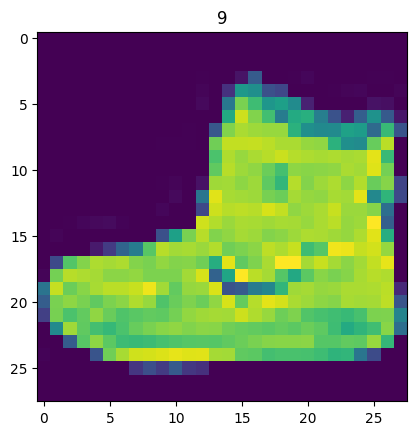

In [4]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [5]:
print(identificacoes_treino.min())
print(identificacoes_treino.max())
total_de_classificacoes = 10

0
9


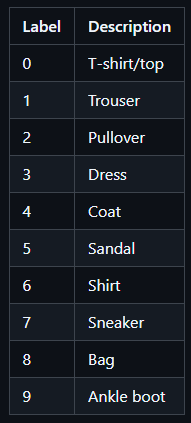

Exbir os dados

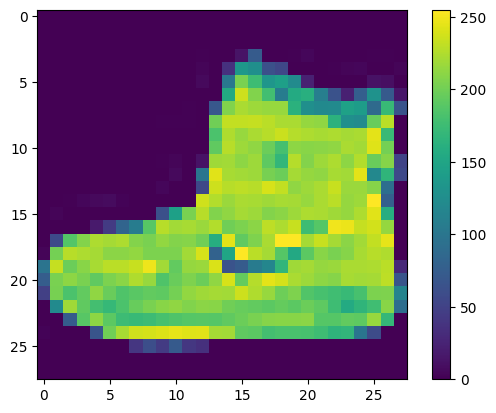

In [6]:
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália',
                           'Camisa', 'Tênis', 'Bolsa', 'Bota']
'''
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

Normalizando as imagens

In [7]:
imagens_treino = imagens_treino / float(255) # dessa forma o gradiente de cor irá de 0 a 1 ao invés de 0 a 255 => Ajuda a diminuir a perda (loss)

Criando, compilando e treinando o modelo

In [37]:
modelo = keras.Sequential([
    # entrada
    keras.layers.Flatten(input_shape=(28, 28)),
    # Flatten achata a nossa imagem transformando ela de uma matriz com 28 linhas para um vetor de 1 linha
    # input_shape=(28, 28) é o tamanho da nossa imagem 28px por 28px

    # processamento (camadas ocultas)
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    # Dense significa que todos os nós dessa camada se conectam com todos os da camada anterior
    keras.layers.Dropout(0.2),
    # Dropout ajuda quando temos caso de overfitting, "desligando" parte dos nós

    # saída
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(learning_rate=0.002)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.keras',
                                             monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino,
                       batch_size=480, epochs=5, validation_split=0.2,
                       callbacks=callbacks)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.6847 - loss: 0.9050 - val_accuracy: 0.8430 - val_loss: 0.4534
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8402 - loss: 0.4549 - val_accuracy: 0.8498 - val_loss: 0.4208
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8536 - loss: 0.4090 - val_accuracy: 0.8662 - val_loss: 0.3789
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8670 - loss: 0.3691 - val_accuracy: 0.8717 - val_loss: 0.3554
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8778 - loss: 0.3355 - val_accuracy: 0.8743 - val_loss: 0.3495


Sumário do modelo

In [9]:
sumario_modelo = modelo.summary()
# resumo do modelo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 610,592 (2.33 MB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 407,062 (1.55 MB)

Pesos da 1a camada Dense

In [10]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.02092403,  0.06933142,  0.01035355, ...,  0.10635604,
        -0.06841366,  0.01130475],
       [-0.06175237,  0.01701641,  0.05355233, ...,  0.04255183,
        -0.06288105,  0.06545874],
       [-0.1356109 ,  0.05630092, -0.07353673, ...,  0.00956763,
        -0.19602972,  0.04232502],
       ...,
       [-0.11139347, -0.03277043,  0.01659214, ..., -0.00781877,
        -0.08665287, -0.06480652],
       [-0.0625374 , -0.01022514, -0.04514521, ...,  0.10668509,
        -0.07505371,  0.10075283],
       [-0.12482348,  0.06873682,  0.04951672, ...,  0.00245538,
         0.0478649 , -0.10236202]], dtype=float32)

In [11]:
pesos_camada_dense.shape

(784, 256)

In [12]:
# com isso vamos zerar os pesos mas manter os vieses como ja estavam

vieses_camada_dense = modelo.layers[1].get_weights()[1]
pesos_camada_dense_zerados = np.zeros((784, 256))

pesos_camada_dense_aleatorios = np.random.rand(784, 256)

# modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()

[array([[0.44232568, 0.3418443 , 0.5675423 , ..., 0.4538999 , 0.57794684,
         0.5507124 ],
        [0.2162112 , 0.20941076, 0.36167058, ..., 0.12693638, 0.9245727 ,
         0.3957909 ],
        [0.5333753 , 0.45057985, 0.9027914 , ..., 0.74903476, 0.59958756,
         0.42069858],
        ...,
        [0.85994285, 0.753536  , 0.06806403, ..., 0.60335994, 0.14664342,
         0.28203425],
        [0.6392786 , 0.8978037 , 0.41379842, ..., 0.83082855, 0.84366053,
         0.53783846],
        [0.23880616, 0.912512  , 0.7877983 , ..., 0.17273916, 0.15362622,
         0.5953374 ]], dtype=float32),
 array([ 0.54439914, -0.02413365, -0.01311855, -0.01009317,  0.05555427,
         0.16626507, -0.07367976, -0.00533038,  0.18602836,  0.14958976,
         0.08416665, -0.01190005, -0.0303353 ,  0.14189911,  0.35227084,
         0.22664987, -0.00253209,  0.46180212,  0.46819463, -0.137535  ,
        -0.00814239,  0.11256471,  0.2849488 , -0.0994378 ,  0.23776789,
         0.2520205 , -0.03820

In [25]:
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3019 - loss: 39.2115 - val_accuracy: 0.6135 - val_loss: 3.9239
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5464 - loss: 7.7045 - val_accuracy: 0.6950 - val_loss: 3.0564
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6228 - loss: 4.2816 - val_accuracy: 0.6538 - val_loss: 2.7783
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6793 - loss: 2.6955 - val_accuracy: 0.7154 - val_loss: 1.8709
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7229 - loss: 1.7054 - val_accuracy: 0.7819 - val_loss: 1.1089


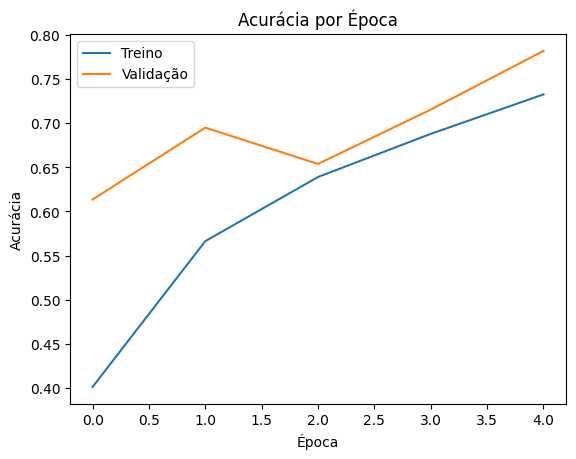

In [26]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

In [15]:
modelo.get_config()

{'name': 'sequential',
 'trainable': True,
 'dtype': {'module': 'keras',
  'class_name': 'DTypePolicy',
  'config': {'name': 'float32'},
  'registered_name': None},
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 28, 28),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Flatten',
   'config': {'name': 'flatten',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'data_format': 'channels_last'},
   'registered_name': None,
   'build_config': {'input_shape': (None, 28, 28)}},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'units

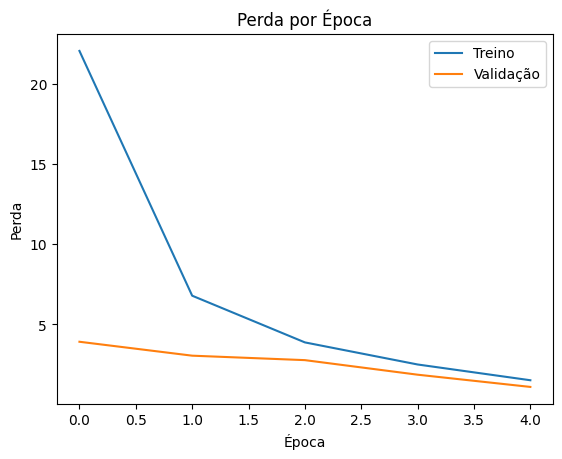

In [27]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

Vieses da 1a camada Dense

In [22]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape
# indica o qual próximo ou qual distante estamos do resultado desejado

(256,)

In [23]:
vieses_camada_dense_zerados = np.zeros((256,))

In [24]:
modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

Visualizando as acurácias de treino e validação por época

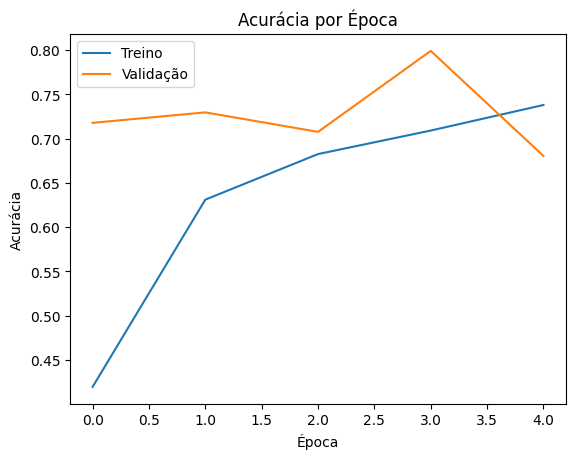

In [18]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

Visualizando as perdas de treino e validação por época

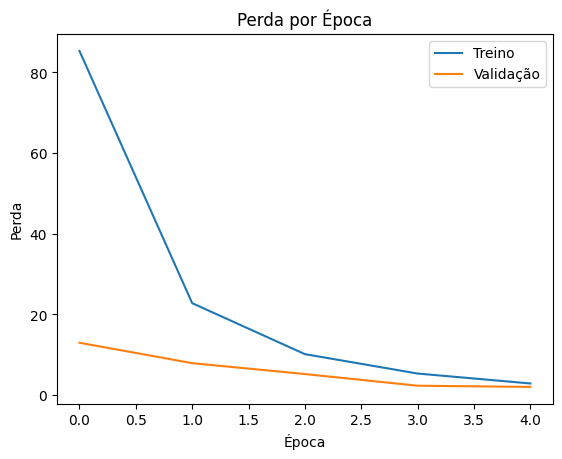

In [19]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Época')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

Testando o modelo

In [20]:
testes = modelo.predict(imagens_teste)

print('Resultado teste: ', np.argmax(testes[1]))
print('Número da imagem de teste: ', identificacoes_teste[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Resultado teste:  6
Número da imagem de teste:  2


Avaliando o modelo

In [21]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste: ', perda_teste)
print('Acuracia do teste: ', acuracia_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6971 - loss: 482.8260
Perda do teste:  507.1175537109375
Acuracia do teste:  0.7028999924659729
